# <center>Regresión Lineal Simple </center>


Regresión lineal simple. Se usará un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos. Luego, se separan los datos en un set de entrenamiento y en otro set de prueba, crearemos un modelo utilizando un set de entrenamiento, se evaluará utilizando el set de prueba para finalmente usar el modelo para predecir valores desconocidos.


### Importando paquetes Necesarios

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


## Información de la data

### `FuelConsumption.csv`:
Hemos descargado el dataset de consumo de combustible, **`FuelConsumption.csv`**, el cual contiene ratings específicos al consumo de combustible y emisiones de dióxido de carbono para aquellos vehículos ligeros en la venta minorista dentro de Canadá. 

- **MODELYEAR** e.g. 2014, AÑO DEL MODELO
- **MAKE** e.g. Acura, MARCA
- **MODEL** e.g. ILX, MODELO
- **VEHICLE CLASS** e.g. SUV, CLASE DE VEHÍCULO
- **ENGINE SIZE** e.g. 4.7, TAMAÑO DEL MOTOR
- **CYLINDERS** e.g 6, CILINDROS
- **TRANSMISSION** e.g. A6, TRANSMISIÓN
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9, CONSUMO DE COMBUSTIBLE en CIUDAD
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9, CONSUMO DE COMBUSTIBLE EN CARRETERA
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2,CONSUMO DE COMBUSTIBLE EN PEINE
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0, EMISIONES DE CO2


## Leyendo los datos

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# un vistazo dentro del set de datos
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploración de Datos
Tengamos primero una exploración descriptiva de nuestros datos.

In [3]:
# Sumarizar los datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas características para explorar más en detalle.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


podemos dibujar cada una de estas características:

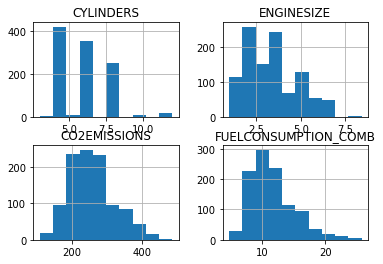

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Text(0.5, 1.0, 'Correlación entre las variables')

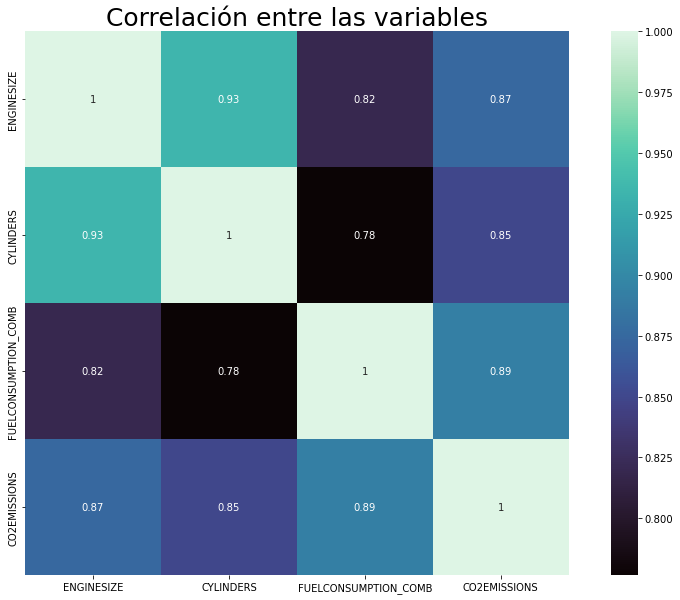

In [6]:
# Análisis de correlación
plt.figure(figsize=(15,10))
sns.heatmap(cdf.corr(),cmap='mako', annot=True, square=True)
plt.title('Correlación entre las variables', fontsize = 25)

Vamos a visualizar la correlación de los datos con un mapa de calor donde podemos evidenciar que en los colores claros existe mas correlación entre las variables, en los colores oscuros existe una correlación baja entre las variables o no estan correlacionadas dichas variables entre si. No vemos correlaciones negativas

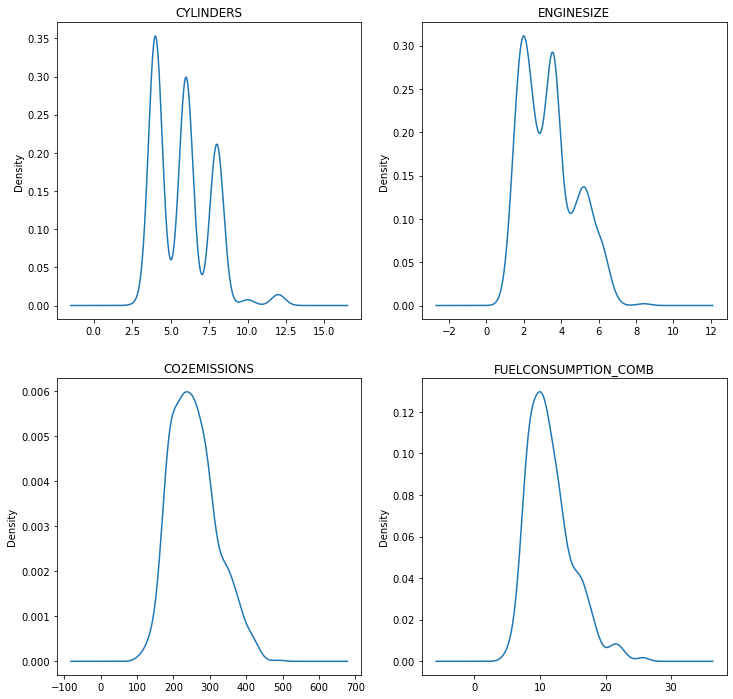

In [7]:
#Gráfica kde de cada una de las variables
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
cdf['CYLINDERS'].plot.kde(); 
plt.title("CYLINDERS");

plt.subplot(2,2,2)
cdf['ENGINESIZE'].plot.kde(); 
plt.title("ENGINESIZE");

plt.subplot(2,2,3)
cdf['CO2EMISSIONS'].plot.kde(); 
plt.title("CO2EMISSIONS");

plt.subplot(2,2,4)
cdf['FUELCONSUMPTION_COMB'].plot.kde(); 
plt.title("FUELCONSUMPTION_COMB");

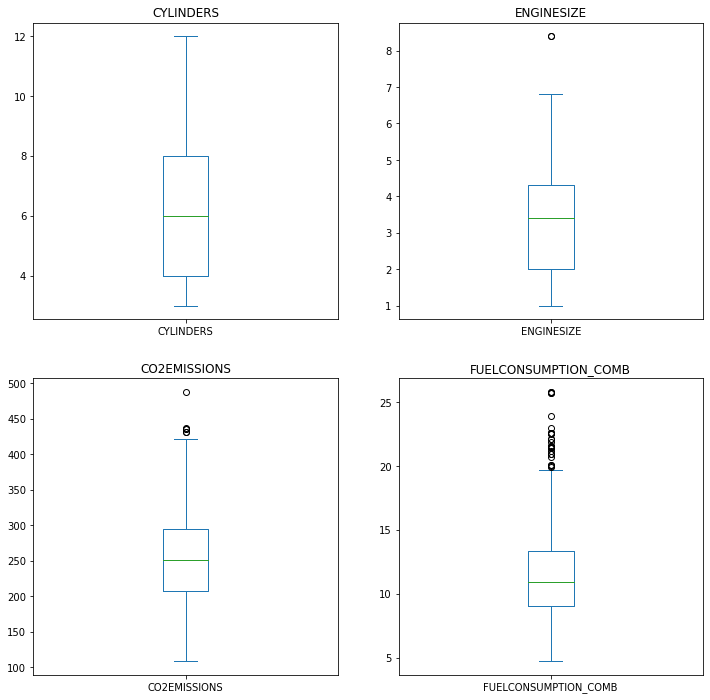

In [8]:
#Gráfica boxplot de cada variable para identificar los datos atípicos
plt.figure(figsize=(12,12))
      
plt.subplot(2,2,1)
cdf['CYLINDERS'].plot.box(); 
plt.title("CYLINDERS");

plt.subplot(2,2,2)
cdf['ENGINESIZE'].plot.box(); 
plt.title("ENGINESIZE");

plt.subplot(2,2,3)
cdf['CO2EMISSIONS'].plot.box(); 
plt.title("CO2EMISSIONS");

plt.subplot(2,2,4)
cdf['FUELCONSUMPTION_COMB'].plot.box(); 
plt.title("FUELCONSUMPTION_COMB");

En la linea verde podemos ver la ultura media, los bordes de la caja en el centro indican el rango intercuartil de los datos, entre los percentiles 25 y 75, los bigotes de los extremos de las barras delgadas indican el tamaño del rango intercuantil más allá de los percentiles 75 y 25. Esto abarca aproximadamente el 99 por ciento de la distribución si los datos son gaussianos o normales. Los puntos que aprecen más allá de los bigotes son valores atípicos.

Ahora, comparemos estas características anteriores con la emisión de carbono, para ver cuán lineal es la regresión:

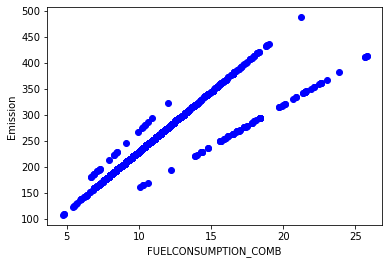

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

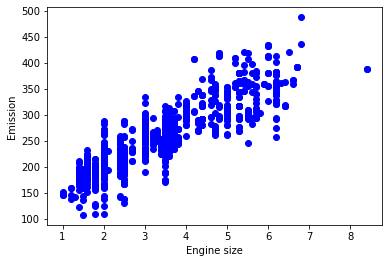

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

veamos cuán lineal es la relación __CYLINDER__ vs la Emisiónn:

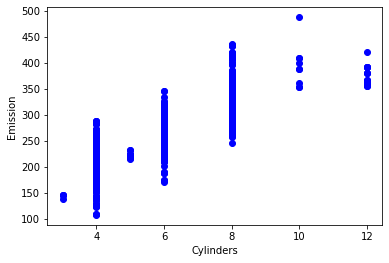

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


#### Creando el set de datos de entrenamiento y el de prueba
Train/Test Split divide el dataseet en uno de entrenamiento y otro de pruebas, siendo excluyentes. Después de ello,  se entrena con el set de entrenamiento y se prueba con el de prueba. 
Esto brinda una evaluación más exacta porque el set de entrenamiento no es parte de un set de datos que se usaron para entrenar datos. Refleja un escenario más real basado en problemas más actuales.

Esto significa que sabemos la salida de cada punto de datos del set, siendo un escenario ideal ! Y como estos datos no se usaron para entrenar el modelo, el modelo no sabe la salida de estos puntos de datos. Asi que, básicamente, es una real prueba fuera de muestra.



In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de Regresión Simple
como sabemos La Regresión Lineal cuadra con un modelo lineal de coeficientes B = (B1, ..., Bn) para minimizar la 'suma residual de cuadrados' entre la x independiente del dataset y la dependiente y por la aproximación lineal.

#### Entrenar distribución de los datos

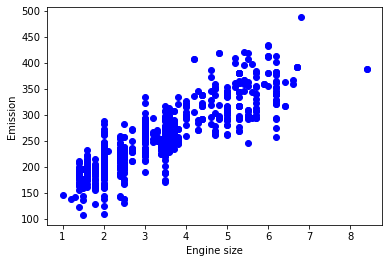

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Usando el paquete sklearn para modelar datos.

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.44127486]]
Intercept:  [127.73184471]


Como se mencionó antes, __Coeficiente__ e __Intercepción__ en la regresión lineal simple, son los parámetros de la recta de ajuste. 
Dado que es una regresión lineal simple, con 2 parámetros solamente, y sabiendo que los parámetros son la intersección y pendiente de la linea, sklearn puede estimarlas directamente a partir de los datos. 
Tener en cuenta que todos los datos deben estar disponibles para poder calcular los parámetros.


#### Trazar las salidas

podemos marcar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

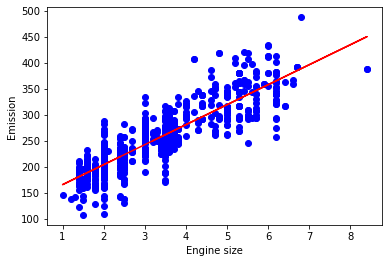

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación
comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. Las métricas de la evaluación proveen un role principal en el desarrollo de un modelo, ya que provee conocimiento profundo en areas que necesitan mejoras.

Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular la exactitud de nuestro modelo basado en el set de prueba: 
- Error absoluto de media: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
    
- Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático. Es más popular que el error de Media absoluto porque hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
    
- Error Cuadrático Medio (RMSE).
    
- R-cuadrática no es un error, sino que es una medida popular para darle precisión a nuestro modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0 y puede tomar valores negativos (porque el modelo puede ser arbitrariamente peor).


In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 22.77
Suma residual de los cuadrados (MSE): 898.84
R2-score: 0.70
